In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import read_mist_models

In [3]:
dir = 'Data/MIST_v1.2_vvcrit0.0_basic_isos/'
iso = read_mist_models.ISO(dir + 'MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')

Reading in: Data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso


In [4]:
iso

In [5]:
cols = iso.hdr_list 
print(cols)

['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'log_L', 'log_LH', 'log_LHe', 'log_Teff', 'log_R', 'log_g', 'surface_h1', 'surface_he3', 'surface_he4', 'surface_c12', 'surface_o16', 'log_center_T', 'log_center_Rho', 'center_gamma', 'center_h1', 'center_he4', 'center_c12', 'phase']


In [6]:
data = iso.isos

In [7]:
dfs = [pd.DataFrame(data=data[i], columns=cols) for i in range(len(data))]

In [8]:
len(dfs)

107

In [9]:
df = pd.concat(dfs)

In [10]:
len(df)

103989

In [140]:
df = df[df.EEP < 800]
df = df[df.star_mass < 2]
len(df)

23529

(4.0, 3.4)

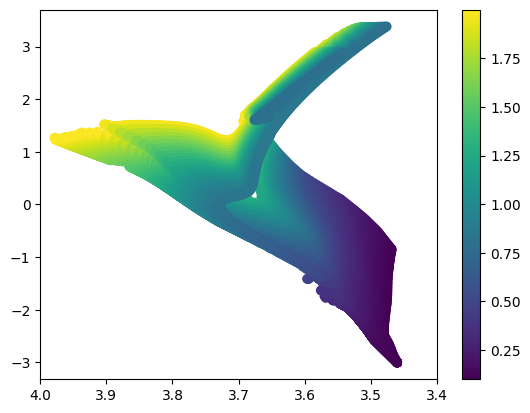

In [141]:
cs = plt.scatter(df.log_Teff, df.log_L, c=df.star_mass)
plt.colorbar(cs)
plt.xlim([4.0, 3.4])

In [142]:
df.to_csv('MIST_low_mass.csv')

In [171]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [180]:
scaler = MinMaxScaler()
pca = PCA(n_components=4)
rcol = ['log10_isochrone_age_yr', 'star_mass', 
        'log_L', 'log_Teff', 'log_R']
X = scaler.fit_transform(df[rcol].values.T)
X_r = pca.fit_transform(X)
np.sum(pca.explained_variance_ratio_)

1.0

(4.0, 3.4)

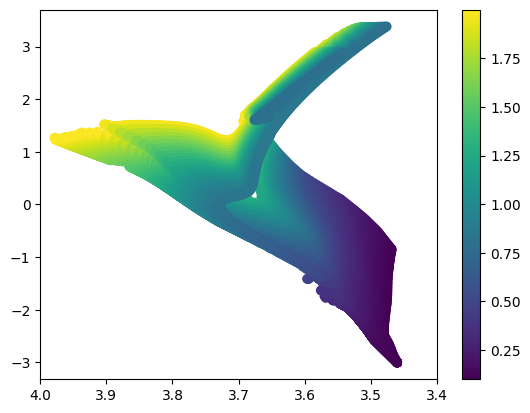

In [181]:
X_dash = scaler.inverse_transform(pca.inverse_transform(X_r))

cs = plt.scatter(X_dash[3, :], X_dash[2, :], c=X_dash[1, :])
plt.colorbar(cs)
plt.xlim([4.0, 3.4])